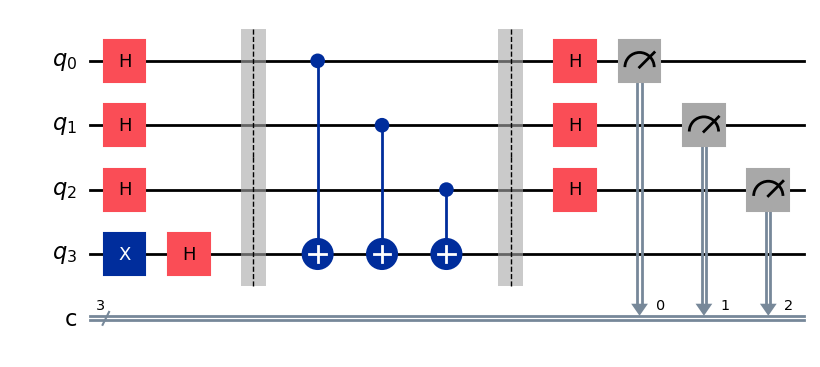

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator  # AerSimulatorを使用
from qiskit.visualization import plot_histogram

# f(x) への入力変数xのbit長
n = 3

# オラクルの選択
oracle_type = "b"  # 'b' : バランス関数  'c' : 定数関数

def apply_oracle(qc, oracle_type, n):
    if oracle_type == "c":  # 定数関数
        if np.random.randint(2):
            qc.x(n)  # 定数関数が1の場合
    else:  # バランス関数
        for ctr in range(n):
            qc.cx(ctr, n)

# 量子回路の生成
qc = QuantumCircuit(n + 1, n)

qc.x(n)  # 最下位量子ビットを反転
qc.h(range(n))  # 上位n量子ビットにHゲート
qc.h(n)  # 最下位ビットにもHゲート
qc.barrier()

# オラクルの適用
apply_oracle(qc, oracle_type, n)
qc.barrier()

# 再度アダマールゲートを上位n量子ビットに適用
qc.h(range(n))

# 測定
qc.measure(range(n), range(n))

# 回路の描画
qc.draw(output='mpl')
# plt.show()

{'111': 1024}


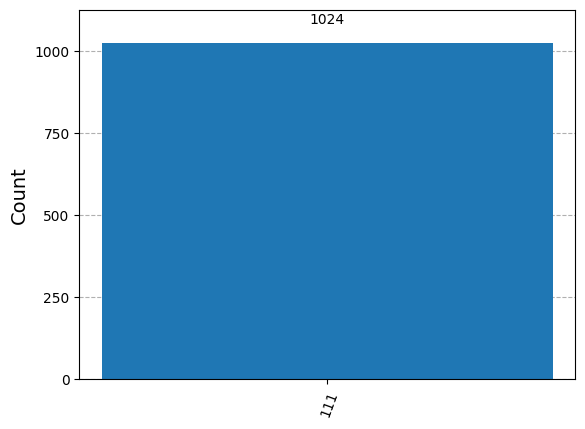

In [2]:
# シミュレーションの実行
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()

# 結果の取得と可視化
answer = result.get_counts()
print(answer)
plot_histogram(answer)
# plt.show()